# Gaussian Mixture + Naive Bayes
We implement the Gaussian mixture naive Bayes model to predict Santander Customer Transaction Prediction data. The problem has a binary target and 200 continuous features, and we assume that these features are conditionally independent given the class. We model the target  Y  as Bernoulli, taking values 0 (negative) and 1 (positive). The features  $$X_0,X_1,…,X_{199}$$ are modelled as continuous random variables. 

$$p_{Y|X_0,X_1,\ldots,X_{199}}(y|x_0,x_1,\ldots,x_{199})=\frac{p_Y(y)\prod_{i=0}^{199}f_{X_i|Y}(x_i|y)}{\sum_{y'=0}^1p_Y(y')\prod_{i=0}^{199}f_{X_i|Y}(x_i|y')}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import time
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
##检查是否有缺失值
train.isnull().any().describe()

count       202
unique        1
top       False
freq        202
dtype: object

In [4]:
train.describe() #查看数据的均值、方差信息。

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
X_train = train.iloc[:, 2:].values.astype('float64')
y_train = train['target'].values

d:\python机器学习\其他\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

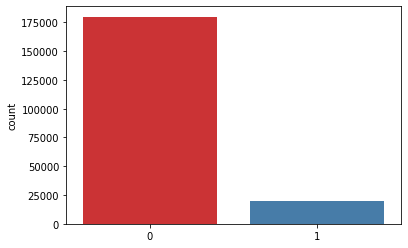

In [6]:
sns.countplot(y_train, palette='Set1')

In [10]:
len(y_train[y_train==1])

20098

In [7]:
def show_time(values):
    t = time.strftime('%H:%M:%S',time.gmtime(values))
    return t

In [1]:
from sklearn import metrics
for i in sorted(metrics.SCORERS.keys()):
    print(i)

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


In [9]:
#下面使用线性回归来进行训练
def logit_regresstion():
    lg_x_train, lg_x_test, lg_y_train, lg_y_test = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=200)
    print('data shape of train:',lg_x_train.shape)
    print('data shape of test',lg_x_test.shape)
    lr1 = LogisticRegression(C=9,dual=False,max_iter=lg_x_train.shape[0])
    start_time = time.time()
    lr1.fit(lg_x_train , lg_y_train)
    print('fitting finished!')
    end_time = time.time()
    print('time consumed of fitting:',show_time(end_time-start_time))
    
    start_time = time.time()
    lg_score = lr1.score(lg_x_test, lg_y_test)
    end_time = time.time()
    print('scoring finished!')
    print('time consumed of scoring:',show_time(end_time-start_time))
    print('test acc of logistics regression without PCA : ',lg_score)
logit_regresstion()

data shape of train: (140000, 200)
data shape of test (60000, 200)
fitting finished!
time consumed of fitting: 00:01:38
scoring finished!
time consumed of scoring: 00:00:00
test acc of logistics regression without PCA :  0.9139333333333334


In [8]:
def logit_regresstion_with_pca():
    lg_x_train, lg_x_test, lg_y_train, lg_y_test = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=200)

    #标准化
    std_scal = StandardScaler().fit(lg_x_train)
    lg_x_train_std = std_scal.transform(lg_x_train)


    #主成分分析，通过求协方差矩阵的特征向量，利用特征向量构成的矩阵对原来的x进行转化-构成顺序按特征值大小逆序排序，转化后的特征数量是和x的特征数量相等的
    sklearn_pca = sklearnPCA().fit(lg_x_train_std)

    #查看主成分分析后的个成分的方差信息，并且归一化
    var_per = sklearn_pca.explained_variance_ratio_
    cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

    l = len(cum_var_per[cum_var_per <= 0.9])
    sklearn_pca = sklearnPCA(n_components=l).fit(lg_x_train_std)

    # 使用主成分分析的结果，对原特征进行较为
    lg_x_train = sklearn_pca.transform(lg_x_train_std)
    lg_x_test = sklearn_pca.transform(std_scal.transform(lg_x_test))
    print('降维后的数据训练数据 shape：',lg_x_train.shape)
    print('降维后的测试数据shape: ',lg_x_test.shape)

    lr1 = LogisticRegression(C=9,dual=False,max_iter=lg_x_train.shape[0])
    start_time = time.time()
    lr1.fit(lg_x_train , lg_y_train)
    print('fitting finished!')
    end_time = time.time()
    print('time consumed of fitting:',show_time(end_time-start_time))
    
    start_time = time.time()
    lg_score = lr1.score(lg_x_test, lg_y_test)
    end_time = time.time()
    print('scoring finished!')
    print('time consumed of scoring:',show_time(end_time-start_time))
    print('test acc of logistics regression with PCA : ',lg_score)
logit_regresstion_with_pca()

降维后的数据训练数据 shape： (140000, 178)
降维后的测试数据shape:  (60000, 178)
fitting finished!
time consumed of fitting: 00:00:00
scoring finished!
time consumed of scoring: 00:00:00
test acc of logistics regression with PCA :  0.9139333333333334


## Getting Acquainted with the Gaussian Mixture Model
The Gaussian mixture model gives a mixture of normal distrubutions. We can use **sklearn.mixture.GaussianMixture** to fit the data and compare it with the histogram to get a feel of its behaviour. We also need to standardize the features because too narrow data can impair the fitting ability of the Gaussian mixture model. There are two important hyperparameters: n_components is the number of normal distributions to mix in and reg_covar is a regularization parameter that controls the spread of the bumps. Note that **score_samples** method gives the log density, so we need to exponentiate to get the density.

## Implementing the Model
We are going to use the Gaussian mixture model to estimate the likelihood probability density functions $f_{X_i|Y}(x_i|y)$.Since multiplying a lot of small numbers will lead to underflow, we take the logarithm and turn products into sums.
$$\ln p_{Y|X_0,X_1,\ldots,X_{199}}(y|x_0,x_1,\ldots,x_{199})=\underbrace{\overbrace{\ln p_Y(y)}^\text{log prior}+\overbrace{\sum_{i=0}^{199}\ln f_{X_i|Y}(x_i|y)}^\text{log likelihood}}_\text{log joint}-\overbrace{\ln\sum_{y'=0}^1e^{\ln p_Y(y')+\sum_{i=0}^{199}\ln f_{X_i|Y}(x_i|y')}}^\text{log marginal}$$
Key points in the implementation are:
+ The log prior is set as the logarithm of the proportion of different classes.
+ The log likelihood is computed by using **sklearn.mixture.GaussianMixture's score_samples** method.
+ Computing the log marginal is prone to overflow/underflow, so we use **scipy.special.logsumexp** to avoid that.
+ In the end, we convert back to probability by exponentiation.

All the heavy lifting is done by the Gaussian mixture model. The rest of the computation is very simple and fast.

In [15]:
a = [np.random.randint(0,10) for i in range(16)]
print(a)

[0, 9, 5, 2, 6, 4, 9, 2, 2, 2, 0, 3, 9, 4, 1, 0]


In [16]:
a =np.array(a).reshape(4,4)

In [18]:
a[[True,True,False,False],0:1]

array([[0],
       [6]])

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import logsumexp

class GaussianMixtureNB(BaseEstimator, ClassifierMixin):
    def __init__(self, n_components=1, reg_covar=1e-06):
        self.n_components = n_components #有几个高斯函数
        self.reg_covar = reg_covar #正则化

    def fit(self, X, y):
        self.log_prior_ = np.log(np.bincount(y) / len(y)) #计算每个类型的y在y中出现的频率，然后取对数
        # shape of self.log_pdf_
        shape = (len(self.log_prior_), X.shape[1]) #前面是y的种类，后面是指标
        self.log_pdf_ = [[GaussianMixture(n_components=self.n_components,
                                          reg_covar=self.reg_covar) #混合高斯分布模型
                          .fit(X[y == i, j:j + 1]) #这个是在使用em算法对模型的参数进行训练,score_, 前一个参数表示样本值，后一个表示特征数
                          .score_samples for j in range(shape[1])] #针对每个类型的每种中标，建立一个高斯模型
                         for i in range(shape[0])] #i表示种类

    def predict_proba(self, X):
        # shape of log_likelihood before summing
        shape = (len(self.log_prior_), X.shape[1], X.shape[0])#第一个表示种类，第二个表示指标，第三个表示样本量
        log_likelihood = np.sum([[self.log_pdf_[i][j](X[:, j:j + 1])
                                  for j in range(shape[1])]
                                 for i in range(shape[0])], axis=1).T##似然计算
        log_joint = self.log_prior_ + log_likelihood
        return np.exp(log_joint - logsumexp(log_joint, axis=1, keepdims=True))# 得到每种类型的概率
        
    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)#返回概率最大的

## Training and Evaluating the Model
We train and evaluate the model by using the training AUC and validation AUC. The process can take time because we train the Gaussian mixture model 400 times, and the training time will increase with higher n_components. In order to speed up the hyperparameter search, we use validation, which is k times faster than k-fold cross-validation. Feel free to use cross-validation if you have the time (and tell me if you find better hyperparameters).

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

i_train, i_valid = next(StratifiedShuffleSplit(n_splits=1).split(X_train, y_train))
print(len(i_train),len(i_valid))

180000 20000


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

pipeline = make_pipeline(StandardScaler(),
                         GaussianMixtureNB(n_components=10, reg_covar=0.03))
pipeline.fit(X_train[i_train], y_train[i_train])
pipeline.score(X_train[i_valid],y_train[i_valid]) # Evaluate the accuracy
print('Training AUC is {}.'
      .format(roc_auc_score(y_train[i_train],
                            pipeline.predict_proba(X_train[i_train])[:, 1])))
print('Validation AUC is {}.'
      .format(roc_auc_score(y_train[i_valid],
                            pipeline.predict_proba(X_train[i_valid])[:, 1])))

Training AUC is 0.9077447370600885.
Validation AUC is 0.8989165069593666.
